## Fasttext + CBOW and Skip Gram

In [ ]:
from gensim.models import FastText

# Step 1: Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "I love learning natural language processing",
    "FastText uses character n-grams to improve embedding quality",
    "Word embeddings help in many NLP tasks",
    "Dogs are better than cats for some people",
    "I enjoy solving problems with machine learning"
]

# Step 2: Preprocess
tokenized = [sentence.lower().split() for sentence in corpus]

# Step 3: Train FastText in CBOW mode (sg=0)
cbow_model = FastText(sentences=tokenized, vector_size=100, window=5, min_count=1, sg=0, epochs=100)

# Step 4: Check embeddings
word = 'learning'
print(f"🔍 Embedding for '{word}':\n{cbow_model.wv[word][:10]}...")  # First 10 values

# Step 5: Similar words
print("\n🔗 Most similar to 'learning':")
print(cbow_model.wv.most_similar('learning', topn=5))

🔍 Embedding for 'learning':
[ 7.8489719e-04 -5.5092871e-05 -1.0345089e-03  2.8868951e-04
 -1.2249848e-03 -4.6768025e-04 -7.4380514e-04 -8.5682009e-04
  1.5211044e-03  1.9396434e-04]...

🔗 Most similar to 'learning':
[('embedding', 0.2744825780391693), ('embeddings', 0.26391923427581787), ('fox', 0.21784138679504395), ('some', 0.19297128915786743), ('n-grams', 0.17175805568695068)]


In [ ]:
from gensim.models import Word2Vec

# Step 1: Use same tokenized corpus
# Already done in previous block

# Step 2: Train Word2Vec using Skip-Gram (sg=1) + Negative Sampling (default)
sg_ns_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, sg=1, negative=10, epochs=100)

# Step 3: Word embedding
word = 'nlp'
print(f"🔍 Embedding for '{word}':\n{sg_ns_model.wv[word][:10]}...")

# Step 4: Word similarity
print("\n🔗 Most similar to 'dogs':")
print(sg_ns_model.wv.most_similar("dogs", topn=3))

🔍 Embedding for 'nlp':
[ 0.00632154  0.00862563 -0.00748682  0.00126707 -0.00717181  0.00377521
  0.01209424  0.00406141  0.00259163  0.00158552]...

🔗 Most similar to 'dogs':
[('the', 0.4701727032661438), ('uses', 0.4059242010116577), ('brown', 0.4016493260860443)]


## NLP Tasks

### Document Rating

In [ ]:
from gensim.models import Word2Vec
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Data
data = [
    ("I loved the movie, it was fantastic!", "positive", 4.5),
    ("The movie was okay, not the best.", "neutral", 3.0),
    ("Terrible movie. Wouldn’t recommend.", "negative", 1.2),
    ("Really enjoyed the characters and plot.", "positive", 4.7),
    ("It was boring and predictable.", "negative", 2.0),
    ("An average film, not too bad.", "neutral", 3.2)
]

# Step 2: Preprocess: lowercase + tokenization
sentences = [text.lower().split() for text, _, _ in data]
scores = [score for _, _, score in data]

# Step 3: Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=2, epochs=100)

# Step 4: Convert each sentence into sentence vector (average of word vectors)
def sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = [sentence_vector(tokens, w2v_model) for tokens in sentences]
y = scores

# Step 5: Train Ridge regression
reg = Ridge()
reg.fit(X, y)

# Step 6: Evaluate on training data
y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"MSE on training data: {mse:.3f}")

# Step 7: Predict new review
new_review = "It was a wonderful and heartwarming film"
new_tokens = new_review.lower().split()
new_vec = sentence_vector(new_tokens, w2v_model)
predicted_score = reg.predict([new_vec])[0]
print(f"Predicted Score for Review: \"{new_review}\" → {predicted_score:.2f}")

MSE on training data: 1.557
Predicted Score for Review: "It was a wonderful and heartwarming film" → 3.10


### Document Clustering


📁 Document Clusters:

Cluster 0:
  - Terrible acting. Couldn't finish watching.
  - A masterpiece with great emotional depth.
  - Very bad movie. Poorly executed.
  - Predictable plot twists. Nothing new to offer.

Cluster 1:
  - It was a boring and predictable movie.
  - A heartwarming story that touched my soul.
  - An exciting thriller that kept me on edge.
  - An inspiring film with powerful messages.
  - Mediocre at best. I expected more.
  - Too many clichés and weak character development.
  - A cinematic experience I won’t forget.
  - Fails to deliver on the hype.
  - A fun ride with lots of laughs.
  - Dragged on forever. I lost interest halfway.
  - Just plain bad. Don't waste your time.
  - It had moments, but overall forgettable.
  - A gem of a movie. Highly recommended!

Cluster 2:
  - Absolutely loved this movie! The story was brilliant.
  - The cinematography and the music were amazing.
  - Fantastic performances by the entire cast.
  - The plot was confusing and slow.
 

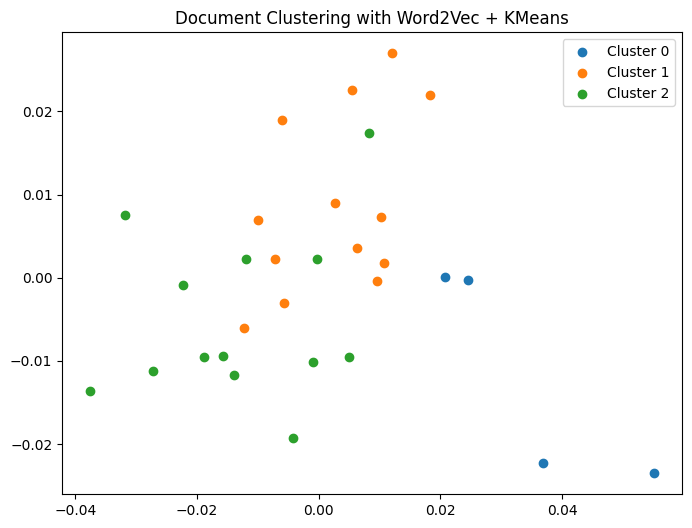

In [ ]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Sample dataset (feel free to replace with your own!)
documents = [
    "Absolutely loved this movie! The story was brilliant.",
    "The cinematography and the music were amazing.",
    "It was a boring and predictable movie.",
    "Fantastic performances by the entire cast.",
    "The plot was confusing and slow.",
    "A heartwarming story that touched my soul.",
    "Terrible acting. Couldn't finish watching.",
    "An exciting thriller that kept me on edge.",
    "Not my cup of tea. Very slow pacing.",
    "The direction and screenplay were top-notch.",
    "A masterpiece with great emotional depth.",
    "Very bad movie. Poorly executed.",
    "An inspiring film with powerful messages.",
    "Mediocre at best. I expected more.",
    "Great visuals but the story lacked impact.",
    "Loved the dialogues and the chemistry between leads.",
    "Too many clichés and weak character development.",
    "One of the best films I've seen this year.",
    "The editing was sloppy and disjointed.",
    "A cinematic experience I won’t forget.",
    "Fails to deliver on the hype.",
    "Stellar performances but the plot was underwhelming.",
    "A fun ride with lots of laughs.",
    "Dragged on forever. I lost interest halfway.",
    "Impressive production design and art direction.",
    "Very emotional and beautifully shot.",
    "Just plain bad. Don't waste your time.",
    "It had moments, but overall forgettable.",
    "A gem of a movie. Highly recommended!",
    "Predictable plot twists. Nothing new to offer."
]

# Step 2: Preprocessing
tokenized_docs = [doc.lower().split() for doc in documents]

# Step 3: Train Word2Vec
w2v_model = Word2Vec(tokenized_docs, vector_size=50, window=5, min_count=1, workers=2, epochs=100)

# Step 4: Convert each document to a vector (average of word vectors)
def get_doc_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X = np.array([get_doc_vector(doc, w2v_model) for doc in tokenized_docs])

# Step 5: KMeans Clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Step 6: Print clustered documents
print("\n📁 Document Clusters:")
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    for idx, label in enumerate(labels):
        if label == i:
            print(f"  - {documents[idx]}")

# Step 7: Optional - Visualize clusters using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_reduced[labels == i, 0], X_reduced[labels == i, 1], label=f"Cluster {i}")
plt.title("Document Clustering with Word2Vec + KMeans")
plt.legend()
plt.show()

### Text Similarity Search

In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Same list of movie review-style documents
documents = [
    "Absolutely loved this movie! The story was brilliant.",
    "The cinematography and the music were amazing.",
    "It was a boring and predictable movie.",
    "Fantastic performances by the entire cast.",
    "The plot was confusing and slow.",
    "A heartwarming story that touched my soul.",
    "Terrible acting. Couldn't finish watching.",
    "An exciting thriller that kept me on edge.",
    "Not my cup of tea. Very slow pacing.",
    "The direction and screenplay were top-notch.",
    "A masterpiece with great emotional depth.",
    "Very bad movie. Poorly executed.",
    "An inspiring film with powerful messages.",
    "Mediocre at best. I expected more.",
    "Great visuals but the story lacked impact.",
    "Loved the dialogues and the chemistry between leads.",
    "Too many clichés and weak character development.",
    "One of the best films I've seen this year.",
    "The editing was sloppy and disjointed.",
    "A cinematic experience I won’t forget.",
    "Fails to deliver on the hype.",
    "Stellar performances but the plot was underwhelming.",
    "A fun ride with lots of laughs.",
    "Dragged on forever. I lost interest halfway.",
    "Impressive production design and art direction.",
    "Very emotional and beautifully shot.",
    "Just plain bad. Don't waste your time.",
    "It had moments, but overall forgettable.",
    "A gem of a movie. Highly recommended!",
    "Predictable plot twists. Nothing new to offer."
]

# Step 2: Tokenize
tokenized_docs = [doc.lower().split() for doc in documents]

# Step 3: Train Word2Vec
w2v_model = Word2Vec(tokenized_docs, vector_size=100, window=5, min_count=1, workers=4, epochs=100)

# Step 4: Create document embeddings
def get_doc_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

doc_embeddings = np.array([get_doc_vector(doc, w2v_model) for doc in tokenized_docs])

# Step 5: Define similarity search
def search_similar_documents(query, top_k=5):
    query_tokens = query.lower().split()
    query_vec = get_doc_vector(query_tokens, w2v_model).reshape(1, -1)
    similarities = cosine_similarity(query_vec, doc_embeddings).flatten()
    top_indices = similarities.argsort()[-top_k:][::-1]

    print(f"\n🔍 Query: {query}")
    print("\n📄 Top Similar Documents:")
    for i in top_indices:
        print(f"  - (Score: {similarities[i]:.3f}) {documents[i]}")

# Step 6: Run search
search_similar_documents("emotional story about love and friendship")
search_similar_documents("thrilling and action packed movie")
search_similar_documents("confusing and poorly made film")


🔍 Query: emotional story about love and friendship

📄 Top Similar Documents:
  - (Score: 0.958) The plot was confusing and slow.
  - (Score: 0.958) Absolutely loved this movie! The story was brilliant.
  - (Score: 0.957) It was a boring and predictable movie.
  - (Score: 0.956) The editing was sloppy and disjointed.
  - (Score: 0.955) Very emotional and beautifully shot.

🔍 Query: thrilling and action packed movie

📄 Top Similar Documents:
  - (Score: 0.955) The plot was confusing and slow.
  - (Score: 0.951) It was a boring and predictable movie.
  - (Score: 0.950) Loved the dialogues and the chemistry between leads.
  - (Score: 0.950) The editing was sloppy and disjointed.
  - (Score: 0.950) The cinematography and the music were amazing.

🔍 Query: confusing and poorly made film

📄 Top Similar Documents:
  - (Score: 0.948) The plot was confusing and slow.
  - (Score: 0.933) One of the best films I've seen this year.
  - (Score: 0.930) Absolutely loved this movie! The story was brilli